Basics:
    
https://towardsdatascience.com/logistic-regression-the-basics-b1716661c71b
    
https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
    
https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389
    
http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [298]:
#Code with explanation: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

#modules

import numpy as np
import pandas as pd

In [299]:
#Data: kaggle source: https://www.kaggle.com/uciml/pima-indians-diabetes-database
diabetes = pd.read_csv("datasets_228_482_diabetes.csv")

In [300]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [301]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [302]:
#Class imbalanced dataset 50:50 60:40 70:30 80:20 90:10
#number 
#balanced smote class_weight
#normalized data or standardised data

diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [303]:
#spliting independent features and target label
X = diabetes.iloc[:,:-1]  #independent features
Y = diabetes["Outcome"]  #dependent feature or target 

#Y = 2X + 3

In [304]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [305]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [306]:
#sklearn for train test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#train ==> i will teach my model, frame mathematical equation
#test

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state = 0)

In [308]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [309]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [310]:
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform


from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
std_scalar.fit_transform(X_train) 
std_scalar.transform(X_test) 

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [311]:
from sklearn.preprocessing import MinMaxScaler

min_scalar = MinMaxScaler()
min_scalar.fit_transform(X_train) 
min_scalar.transform(X_test) 

array([[0.05882353, 1.00505051, 0.62295082, ..., 0.63934426, 0.56191289,
        0.01666667],
       [0.11764706, 0.54040404, 0.60655738, ..., 0.50074516, 0.13919727,
        0.03333333],
       [0.23529412, 0.38383838, 0.50819672, ..., 0.50670641, 0.13364646,
        0.06666667],
       ...,
       [0.23529412, 0.71717172, 0.70491803, ..., 0.6557377 , 0.24210077,
        0.01666667],
       [0.17647059, 0.58585859, 0.60655738, ..., 0.39195231, 0.01238258,
        0.05      ],
       [0.05882353, 0.54040404, 0.59016393, ..., 0.45901639, 0.31725021,
        0.05      ]])

In [312]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#Model development and prediction

#sklearn model to load Logistic regression package
from sklearn.linear_model import LogisticRegression
#max_iter=1200000, dual=False , class_weight="balanced", penalty="none"
logreg = LogisticRegression()

#Fit training data 
logreg.fit(X_train, y_train)

#Predict unseen data on trained model
y_pred = logreg.predict(X_test)

C:\Users\kanna\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [313]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [314]:
from sklearn.metrics import confusion_matrix

In [315]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [316]:
conf_matrix

array([[98,  9],
       [18, 29]], dtype=int64)

In [317]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8246753246753247

In [318]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.7631578947368421

In [319]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.6170212765957447

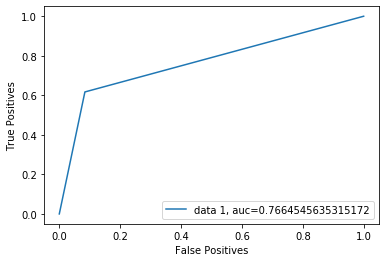

In [320]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.legend(loc=4)
plt.show()